## Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import os
import pyodbc

In [2]:
conexion = pyodbc.connect('Driver={SQL Server};'
'Server=DESKTOP-34T1EIQ;'
'Database=RepuestosWeb;'
'Trusted_Connection=yes;', timeout=5000)

In [3]:
df_Orders=pd.read_sql("select * from VW_OrdenesEncimaPromedio", conexion)
#se quita total orden debido a que totalencima promedio ya calcula si el total 
#orden esta arriba o abajo de la medicion que buscamos por lo que es incesario
df_Orders.drop('Total_Orden', axis=1, inplace=True)
df_Orders.head(10)

,NombreCiudad,Genero,ID_Parte,ID_Categoria,TotalEncimaPromedio
0,San Diego,M,AC1100173CORE-ORIG.REC,1612,1
1,Tacoma,F,AC1320108-ORIG.REC,2827,0
2,Akron,M,AC1228119-ORIG.REC,3154,0
3,Richmond,M,AC1217107,3225,1
4,Dallas,F,AC2519105-ORIG.REC,4241,0
5,Shreveport,F,AC1100177-ORIG.REC,2512,1
6,Fresno,M,AC1114104C,2560,0
7,Boston,F,AC1249128,3847,0
8,Louisville,F,AC1228103,2598,0
9,St. Louis,M,AC1115103C-ORIG.REC,2746,0


In [4]:
#almacenar las variables x y y
#esto es para poder tener las variables dependientes e indipendientes
#independientes variables de entradas que identifican los atributos de cada uno de los elementos
#variable dependiente  que son las salida que son las que dependen de las de entrada para que se cumplan

x=df_Orders.iloc[:, 0:4].values

y=df_Orders.iloc[:,-1].values
#esto se vuelve un arreglo

In [5]:
#aplicar encoder
#podermo codificar atriutos no numericos segun una escala

le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])
x

array([[76, 1, 3, 1089],
       [87, 0, 159, 2120],
       [0, 1, 78, 2421],
       ...,
       [87, 1, 11895, 5359],
       [8, 0, 11898, 5705],
       [34, 0, 11900, 5692]], dtype=object)

In [6]:
#dividimos los datos para poder tener datos para entrenamiento y otros para test
#se usa sckikit learn para llamar a la funcion split y lo dividimos en 80/20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)


In [7]:
#crear modelo NB
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [9]:
#con esto podriamos comparar manualmente uno por uno pero es mejor hacer la matriz de confucion
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [10]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred) #crea la matriz de confucion 
ac = accuracy_score(y_test,y_pred) #define la presicion

In [11]:
#matriz de confusion
cm

array([[233, 968],
       [218, 963]], dtype=int64)

In [12]:
#presicion
ac

0.5020990764063812

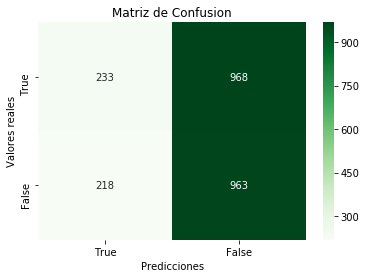

In [13]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz

#### Comparacion entre los valores reales y las predicciones. 245 verdaderos positivos y los 963 es lo que predijo de la otra parte correctamente 
#### el 219 falso positivo error de tipo 1 y 955 errores 2 falsos negativo

## Arboles de decision

In [14]:
#creamos el modelo de arbol
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred = DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
#con esto podriamos comparar manualmente uno por uno pero es mejor hacer la matriz de confucion
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [17]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred) #crea la matriz de confucion 
ac = accuracy_score(y_test,y_pred) #define la presicion

In [18]:
#matriz de confucion
cm

array([[603, 598],
       [586, 595]], dtype=int64)

In [19]:
#presicion
ac

0.5029387069689337

#### graficar arbol

In [21]:
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus

# feature_cols = ['NombreCiudad','Genero','ID_Partes','ID_Categoria'] ##DEFINICION DE LAS VARIABLES DE ENTRADAS
# dot_data = StringIO()
# export_graphviz(DTClassifier, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['True','False'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DTTree.png')
# Image(graph.create_png())
##gini metodo de evaluacion para identificar el atributo mas significativo   y entre mas alto el gini msa arriba va estar en el arbol



### creacion de arbol con entropy y profundidad especifica

In [22]:
#creamos el modelo de arbol con una profundidad especifica y con un criterio disitnto a gini. esto se hace solo si se tienen muchos niveles en el arbol 
#si los arboles son muy profundos no es muy bueno porque puede haber un sobre ajuste
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
#predecimos la varible dependiente usando las variables independientes del 20%
y_pred = DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
#con esto podriamos comparar manualmente uno por uno pero es mejor hacer la matriz de confucion
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
#generarmos la matriz de confucion y precision
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred) #crea la matriz de confucion 
ac = accuracy_score(y_test,y_pred) #define la presicion

In [26]:
cm

array([[  41, 1160],
       [  38, 1143]], dtype=int64)

In [27]:
ac

0.49706129303106633

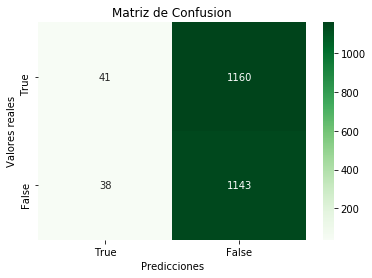

In [28]:
#ploteamos la matriz de confucion(heatmap)
import seaborn as sns

ax=plt.subplot()
sns.heatmap(cm,annot=True, fmt='g', ax=ax, cmap='Greens'); ##annot= true crea abitacuibes be las celdas para crear etiquetas, fmt=g quita la notacion cientifica para quitar las celtas , cmap mostrar colores en verdes, ax es el subplot parte del plot

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); #etiquetas para los ejes
ax.set_title('Matriz de Confusion');#titulos
ax.xaxis.set_ticklabels(['True','False']); ax.yaxis.set_ticklabels(['True','False']);#son etiquetas de clasificacion de la matriz

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
DTRandomForest=RandomForestClassifier(criterion='entropy', random_state=42) # basodo en entropia y el random state te doy una semilla aletoria para que seimpre siga el mismo caminio
DTRandomForest.fit(x_train, y_train)

C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [32]:
y_pred = DTRandomForest.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [33]:
## precision esto lo uso para comparar poro como uso el mismo x y x no se puede en este caso 
print('Training Set Evaluation F1-Score=>',metrics.accuracy_score(y_test,y_pred))

Training Set Evaluation F1-Score=> 0.5046179680940386
